In [165]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from ipywidgets import *
import tensorflow as tf

In [469]:
from tqdm.notebook import tqdm

Define some nonlinearities

For this notebook, we define our nonlinearity as $f := \frac{1}{1+e^{-x}}$

In [166]:
f = lambda x: x**2

In [167]:
N = 2 #width
M = 2 #depth

X = np.array([np.linspace(0,1,100) for i in range(N)])

#W = np.random.normal(0,1, size=(M,N,N))
#B = np.random.normal(0,1, size=(M,N))

@interact(w111=1.0, w112=1.0, w121=1.0, w122=1.0,
          w211=1.0, w212=1.0, w221=1.0, w222=1.0,
         b11=1.0, b12=1.0, b21=1.0, b22=1.0)
def quad_nn(w111=1.0, w112=1.0, w121=1.0, w122=1.0,
          w211=1.0, w212=1.0, w221=1.0, w222=1.0,
           b11=1.0, b12=1.0, b21=1.0, b22=1.0):
    W = np.array([[[w111,w112],[w121, w122]],
                  [[w211,w212],[w221, w222]]])
    B = np.array([[b11,b12], [b21,b22]])

    Lp = X.copy()
    L = X.copy()
    for m in range(M):
        L = (((W[m]@Lp).T + B[m]).T)**2
        Lp = L

    return plt.plot(X[0], Lp[0])

interactive(children=(FloatSlider(value=1.0, description='w111', max=3.0, min=-1.0), FloatSlider(value=1.0, de…

In [559]:
@interact_manual()
def rand_quad(width=3, depth=2):
    N = width #width
    M = depth #depth

    X = np.array([np.linspace(-1,1,100) for i in range(N)])

    W = np.random.uniform(-1,1, size=(M,N,N))
    B = np.random.uniform(-1,1, size=(M,N))

    Lp = X.copy()
    L = X.copy()
    for m in range(M):
        L = (((W[m]@Lp).T + B[m]).T)**2 
        Lp = L/np.abs(L).max()

    plt.plot(X[0], Lp[0])

interactive(children=(IntSlider(value=3, description='width', max=9, min=-3), IntSlider(value=2, description='…

In [566]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": lambda x: np.where(x>0, x, 0)
}

@interact_manual(neuron=["relu", "quadratic"], depth=(1,10), width=(1,10))
def rand_quad(width=3, depth=2, neuron="relu"):
    N = width #width
    M = depth #depth

    X = np.array([np.linspace(-1,1,100) for i in range(N)])

    W = np.random.uniform(-1,1, size=(M,N,N))
    B = np.random.uniform(-0.25,0.25, size=(M,N))

    Lp = X.copy()
    L = X.copy()
    for m in range(M):
        L = neurons[neuron](((W[m]@Lp).T + B[m]).T)
        Lp=L
        #if (np.abs(L).max() > 10):
        #    Lp = L/np.abs(L).max()

    plt.plot(X[0], Lp[0])
    #display(W,B)

interactive(children=(IntSlider(value=3, description='width', max=10, min=1), IntSlider(value=2, description='…

In [470]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}

@interact_manual(neuron=["relu", "quadratic"], depth=(1,10), width=(1,10))
def rand_quad(width=3, depth=2, neuron="relu"):
    N = width #width
    M = depth #depth

    X = np.array([np.linspace(-1,1,100)])

    inputs = tf.keras.Input(shape=(1,))
    outputs = inputs
    for i in range(M):
        outputs = tf.keras.layers.Dense(N,
                                        activation=neurons[neuron],
                                        kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1, seed=None),
                                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))(outputs)
    outputs = tf.keras.layers.Dense(1,
                                    kernel_initializer=tf.keras.initializers.Ones(),
                                    bias_initializer='zeros')(outputs)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile()
    
    Y = model.predict(X.T)
    
    plt.plot(X.T, Y, c="black")


interactive(children=(IntSlider(value=3, description='width', max=10, min=1), IntSlider(value=2, description='…

Manually construct a 3x2 network with 9 turning points

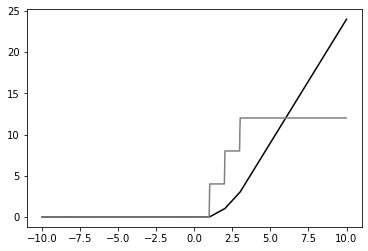

In [565]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}

N = 3 #width
M = 2 #depth

X = np.array([np.linspace(-10,10,1000)])

inputs = tf.keras.Input(shape=(1,))
outputs = inputs

weight = np.array([[1.0, 1.0, 1.0]])
bias = np.array([-1.0, -2.0, -3.0])

outputs = tf.keras.layers.Dense(N,
                                activation=neurons[neuron],
                                weights=[weight, bias])(outputs)

weight = np.array([[1.0, -1.0, 0.0],
                  [1.0, -1.0, 0.0],
                  [1.0, -1.0, 0.0]])
bias = np.array([0, 0, 0])
outputs = tf.keras.layers.Dense(N,
                                 activation=neurons[neuron],
                                 weights=[weight, bias])(outputs)

weight = np.array([[1.0, 1.0, 1.0]]).T
bias = np.array([0.0])
outputs = tf.keras.layers.Dense(1,
                                weights=[weight, bias])(outputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile()

Y = model.predict(X.T)

plt.plot(X.T, Y, c="black")
plt.plot(X.T[:-1], np.diff(Y.flatten())*200, c="gray")


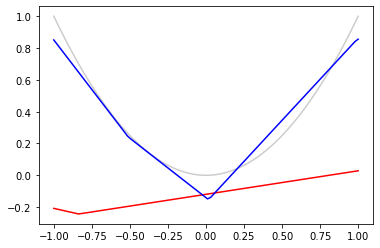

In [431]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}

width=3
depth=2
neuron="relu"

N = width #width
M = depth #depth

X = np.array([np.linspace(-1,1,100)])
Y_train  = X**2

inputs = tf.keras.Input(shape=(1,))
outputs = inputs
for i in range(M):
    outputs = tf.keras.layers.Dense(N,
                                    activation=neurons[neuron],
                                    kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                    bias_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None))(outputs)
outputs = tf.keras.layers.Dense(1,
                                kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                bias_initializer='zeros')(outputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),  # Optimize
    loss=tf.keras.losses.MeanSquaredError())

plt.plot(X.T, Y_train.T, c="black", alpha=0.2)

Y = model.predict(X.T)

plt.plot(X.T, Y, c="red")

Y = model.fit(X.T, Y_train.T, epochs=100, verbose=0)

Y = model.predict(X.T)

plt.plot(X.T, Y, c="blue")



The total number of possible turning points here with N width and M depth is $N^M$. But there will be some enforced symmetries.

No matter, 

In [306]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}

width=3
depth=2
neuron="relu"

N = width #width
M = depth #depth

X = np.array([np.linspace(-1,1,100)])
Y_train  = X**2


errors = []
predictions = []
histories = []

for experiments in tqdm(range(100)):
    inputs = tf.keras.Input(shape=(1,))
    outputs = inputs
    for i in range(M):
        outputs = tf.keras.layers.Dense(N,
                                        activation=neurons[neuron],
                                        kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None))(outputs)
    outputs = tf.keras.layers.Dense(1,
                                    kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                    bias_initializer='zeros')(outputs)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),  # Optimize
        loss=tf.keras.losses.MeanSquaredError())

    #plt.plot(X.T, Y_train.T, c="black", alpha=0.2)

    Y = model.predict(X.T)

    #plt.plot(X.T, Y, c="red")

    history = model.fit(X.T, Y_train.T, epochs=100, verbose=0)

    Y = model.predict(X.T)

    #plt.plot(X.T, Y, c="blue")
    
    errors.append(history.history["loss"][-1])
    predictions.append(Y)
    histories.append(history)

100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


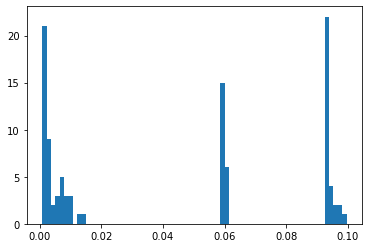

In [307]:
h = plt.hist(errors, bins=70)
plt.show()

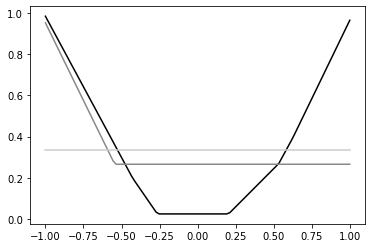

In [335]:
errors = np.array(errors)

g1 = np.where(errors>0.00, errors, np.Inf).argmin()
g2 = np.where(errors>0.04, errors, np.Inf).argmin()
g3 = np.where(errors>0.08, errors, np.Inf).argmin()


plt.plot(X.T, predictions[g1], color="#000")
plt.plot(X.T, predictions[g2], color="#888")
plt.plot(X.T, predictions[g3], color="#CCC")

In [334]:
np.where(errors>0.04, errors, np.Inf).argmin()

52

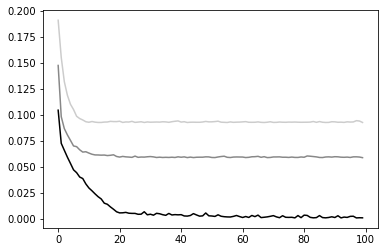

In [336]:
plt.plot(np.arange(0,100), histories[g1].history["loss"], color="#000")
plt.plot(np.arange(0,100), histories[g2].history["loss"], color="#888")
plt.plot(np.arange(0,100), histories[g3].history["loss"], color="#CCC")

This is great, but why are we only seeing five linear regions instead of the maximum theoretical nine? Perhaps this is because the parabola is only two-symmetric? So there's no need for three neurons in the 2nd layer. Two would suffice.

In [337]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}

width=3
depth=2
neuron="relu"

N = width #width
M = depth #depth

X = np.array([np.linspace(-1,1,100)])
Y_train  = X**2


errors = []
predictions = []
histories = []

for experiments in tqdm(range(100)):
    inputs = tf.keras.Input(shape=(1,))
    outputs = inputs
    for i in range(M):
        outputs = tf.keras.layers.Dense(N,
                                        activation=neurons[neuron],
                                        kernel_initializer=tf.keras.initializers.GlorotNormal(),
                                        bias_initializer=tf.keras.initializers.GlorotNormal())(outputs)
    outputs = tf.keras.layers.Dense(1,
                                    kernel_initializer=tf.keras.initializers.GlorotNormal(),
                                    bias_initializer='zeros')(outputs)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),  # Optimize
        loss=tf.keras.losses.MeanSquaredError())

    #plt.plot(X.T, Y_train.T, c="black", alpha=0.2)

    Y = model.predict(X.T)

    #plt.plot(X.T, Y, c="red")

    history = model.fit(X.T, Y_train.T, epochs=100, verbose=0)

    Y = model.predict(X.T)

    #plt.plot(X.T, Y, c="blue")
    
    errors.append(history.history["loss"][-1])
    predictions.append(Y)
    histories.append(history)

100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


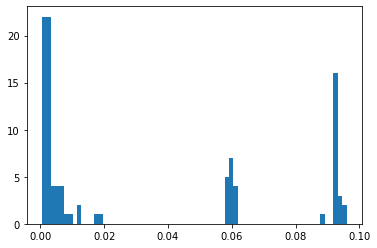

In [338]:
h = plt.hist(errors, bins=70)
plt.show()

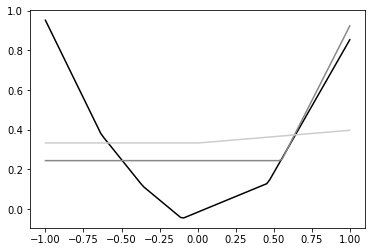

In [339]:
errors = np.array(errors)

g1 = np.where(errors>0.00, errors, np.Inf).argmin()
g2 = np.where(errors>0.04, errors, np.Inf).argmin()
g3 = np.where(errors>0.08, errors, np.Inf).argmin()


plt.plot(X.T, predictions[g1], color="#000")
plt.plot(X.T, predictions[g2], color="#888")
plt.plot(X.T, predictions[g3], color="#CCC")

# by width and height

In [471]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}
neuron="relu"

width_depth = [
    (2,2),
    (3,2),
    (2,3),
    (3,3)
]

X = np.array([np.linspace(-1,1,100)])
Y_train  = X**2

results = {}

for width, depth in tqdm(width_depth):

    errors = []
    predictions = []
    histories = []

    for experiments in tqdm(range(100)):
        inputs = tf.keras.Input(shape=(1,))
        outputs = inputs
        for i in range(M):
            outputs = tf.keras.layers.Dense(N,
                                            activation=neurons[neuron],
                                            kernel_initializer=tf.keras.initializers.GlorotNormal(),
                                            bias_initializer=tf.keras.initializers.GlorotNormal())(outputs)
        outputs = tf.keras.layers.Dense(1,
                                        kernel_initializer=tf.keras.initializers.GlorotNormal(),
                                        bias_initializer='zeros')(outputs)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),  # Optimize
            loss=tf.keras.losses.MeanSquaredError())

        #plt.plot(X.T, Y_train.T, c="black", alpha=0.2)

        Y = model.predict(X.T)

        #plt.plot(X.T, Y, c="red")

        history = model.fit(X.T, Y_train.T, epochs=100, verbose=0)

        Y = model.predict(X.T)

        #plt.plot(X.T, Y, c="blue")

        errors.append(history.history["loss"][-1])
        predictions.append(Y)
        histories.append(history)
    
    results[(width,depth)] = {
        "errors": errors,
        "predictions": predictions,
        "histories": histories
    }

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

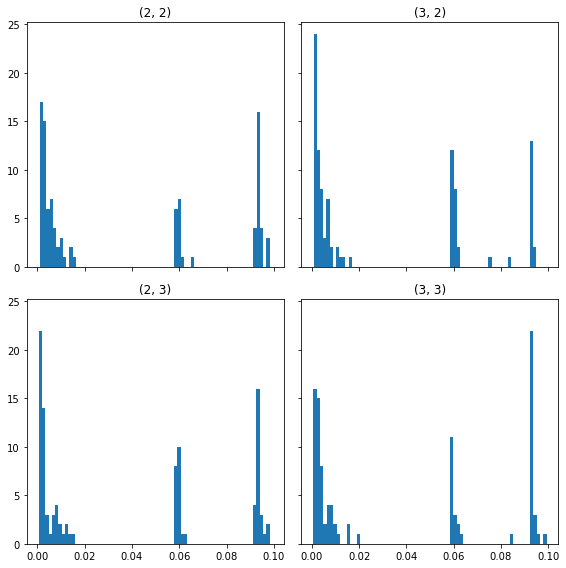

In [503]:
def plot_loghist(x, bins):
  _, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

fig, axs = plt.subplots(2,2, figsize=(8,8), sharey=True, sharex=True)
axs = axs.flatten()
i = 0
for key in results.keys():
    plt.sca(axs[i])
    i = i +1
    plt.hist(results[key]["errors"], bins=70)
    plt.title(key)
    
plt.tight_layout()

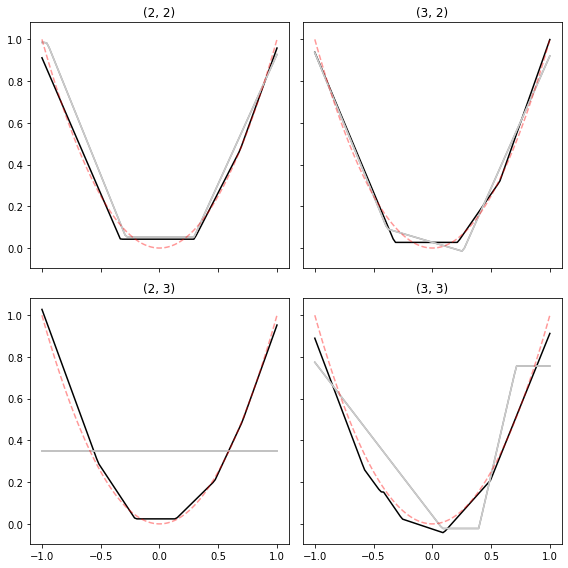

In [511]:
fig, axs = plt.subplots(2,2, figsize=(8,8), sharey=True, sharex=True)
axs = axs.flatten()
i = 0
for key in results.keys():
    plt.sca(axs[i])
    i = i +1
    
    errors = np.array(results[key]["errors"])
    
    g1 = np.where(errors>0.0, errors, np.Inf).argmin()
    g2 = np.where(errors>0.3, errors, np.Inf).argmin()
    g3 = np.where(errors>0.8, errors, np.Inf).argmin()

    predictions = results[key]["predictions"]
    plt.plot(X.T, predictions[g1], color="#000")
    plt.plot(X.T, predictions[g2], color="#888")
    plt.plot(X.T, predictions[g3], color="#CCC")
    plt.plot(X.T, Y_train.T, "r--", alpha=0.4)
    
    plt.title(key)
    
plt.tight_layout()

Explore how bifurcations work over training epochs. Can the optimizer create bifurcations in the number of points in the solution? Or is this pre-determined by the random initialzation?

Two theories:

1. The structure of the solution (number of points) is determined by the random initialization. There will be some valley from the random init with the right structure. The optimizer "finds" this pre-ordained structure in the random matrix that best highlights the function.
2. The structure of the solution can be learned by the optimizer. That is, if the random matrix does not provide the right structure for the solution, the optimizer will cause bifurcations in the solution until it finds one.

## Can i find double descent here?

In [539]:
from sklearn.utils import shuffle

In [547]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}

width=3
depth=2
neuron="relu"

N = width #width
M = depth #depth

X = np.array([np.linspace(-1,1,100)]).T
Y_noise = np.random.normal(0,0.1,size=X.shape)
Y = X**2 + Y_noise

errors = []
predictions = []
histories = []

for experiments in tqdm(range(10)):

    inputs = tf.keras.Input(shape=(1,))
    outputs = inputs
    for i in range(M):
        outputs = tf.keras.layers.Dense(N,
                                        activation=neurons[neuron],
                                        kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None))(outputs)
    outputs = tf.keras.layers.Dense(1,
                                    kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                    bias_initializer='zeros')(outputs)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Optimize
        loss=tf.keras.losses.MeanSquaredError())
    
    X_train, y_train = shuffle(X, Y) # Keras does not shuffle before taking val split
    history = model.fit(X_train,
                        y_train,
                        validation_split=0.2,
                        epochs=500,
                        verbose=0)
    
    histories.append(history)

  0%|          | 0/10 [00:00<?, ?it/s]

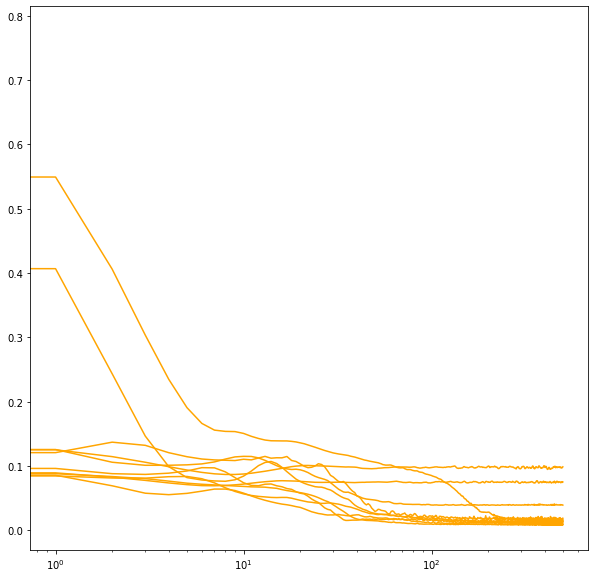

In [551]:
plt.figure(figsize=(10,10))
for h in histories:
    #plt.plot(h.history['loss'],color="blue")
    plt.plot(h.history['val_loss'], color="orange")
    plt.xscale('log')

In [552]:
neurons = {
    "quadratic": lambda x: x**2,
    "relu": "relu"
}

width=100
depth=10
neuron="relu"

N = width #width
M = depth #depth

X = np.array([np.linspace(-1,1,1000)]).T
Y_noise = np.random.normal(0,0.1,size=X.shape)
Y = X**2 + Y_noise

errors = []
predictions = []
histories = []

for experiments in tqdm(range(10)):

    inputs = tf.keras.Input(shape=(1,))
    outputs = inputs
    for i in range(M):
        outputs = tf.keras.layers.Dense(N,
                                        activation=neurons[neuron],
                                        kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None))(outputs)
    outputs = tf.keras.layers.Dense(1,
                                    kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None),
                                    bias_initializer='zeros')(outputs)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Optimize
        loss=tf.keras.losses.MeanSquaredError())
    
    X_train, y_train = shuffle(X, Y) # Keras does not shuffle before taking val split
    history = model.fit(X_train,
                        y_train,
                        validation_split=0.2,
                        epochs=500,
                        verbose=0)
    
    histories.append(history)

  0%|          | 0/10 [00:00<?, ?it/s]

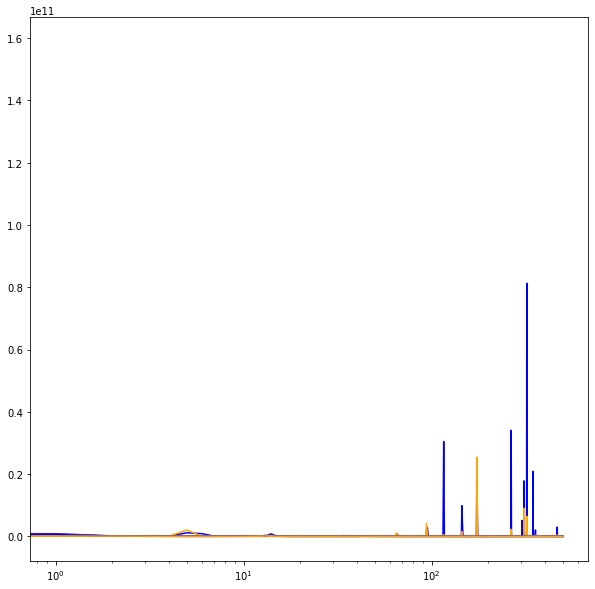

In [558]:
plt.figure(figsize=(10,10))
for h in histories:
    plt.plot(h.history['loss'],color="blue")
    plt.plot(h.history['val_loss'], color="orange")
    plt.xscale('log')

## One input, one output, one layer, width = 1

### Forward

This simplest case neural net has one input $x$ and one output $y$. In functional notation we have $ y = f(ax + b) $

In [5]:
def forward(a,b,x):
    return f(a*x + b)

In [6]:
forward(0.01, 0, 1)

0.5024999791668749

By training parameters a and b, this very simple neural network can nearly perfectly fit data from three types of functions. Step functions of the form $y = ax$, binary function of the form $y = a if, b if$, and logistic functions themselves, of the form $y = a f(x) + b$

In [7]:
x = np.linspace(-10,10,100)

def plt_one(a,b):
    plt.scatter(x,forward(a,b,x), color="blue")
    plt.show()
    
interact(plt_one, a=(-10,10,0.1), b=(-10,10,0.1))

<function __main__.plt_one>

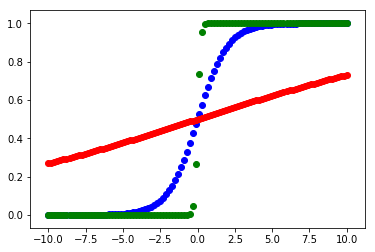

In [8]:
plt.scatter(x,forward(1,0,x), color="blue")
plt.scatter(x,forward(0.1,0,x), color="red")
plt.scatter(x,forward(10,0,x), color="green")

### Step Function $( a >> 1 )$
The step function occurs with relatively large $a$. That is, the $a$ parameter scales the input data to a much larger domain than the curved part of the logistic function.

The location of the step function can be controlled by using the $b$ parameter. Notice that the $b$ parameter is scaled by the $a$ parameter, so in our case with $a=10$, $b=90$ the step will be placed at $x=9$.

The direction of the step function is controlled by the sign of $a$.

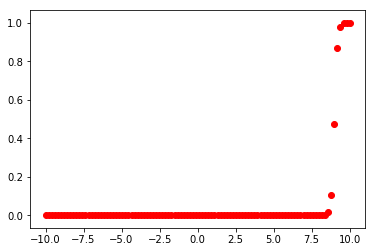

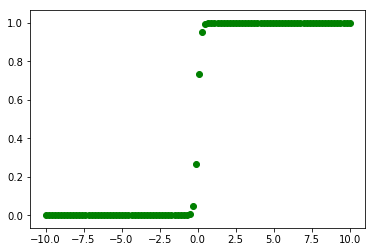

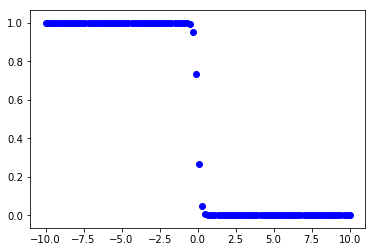

In [9]:
x = np.linspace(-10,10,100)
plt.scatter(x,forward(10,-90,x), color="red")
plt.show()
plt.scatter(x,forward(10,0,x), color="green")
plt.show()
plt.scatter(x,forward(-10,0,x), color="blue")
plt.show()

### Linear Function $( a << 1 )$

The linear function occurs with relatively small $a$. That is, the $a$ parameter scales the input data to a much smaller domain than the curved part of the logistic function.

The slope of the linear function can be somewhat controlled by setting the $b$ parameter. The direction of the slope can be controlled by the sign of the $a$ parameter.

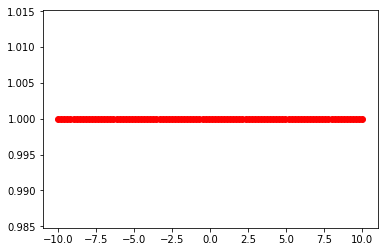

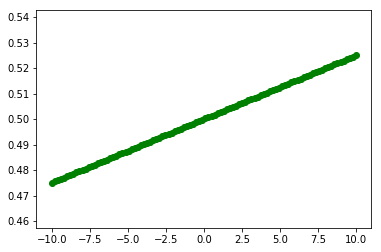

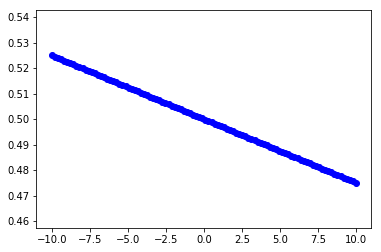

In [9]:
x = np.linspace(-10,10,100)
plt.scatter(x,forward(0.01,10,x), color="red")
plt.show()
plt.scatter(x,forward(0.01,0,x), color="green")
plt.show()
plt.scatter(x,forward(-0.01,0,x), color="blue")
plt.show()

### Sigmoid Function $( a = 1 )$

### Backprop

## One input, one output, two layers, width = 1

In [10]:
def forward_2(a,b,x):
    return f(a[1]*f(a[0]*x + b[0])+b[1])

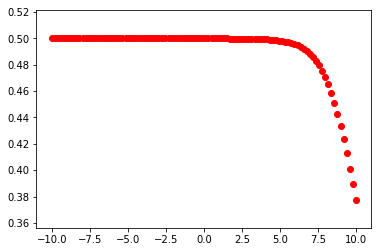

In [11]:
x = np.linspace(-10,10,100)
#plt.scatter(x,forward([1,1],[0,0],x), color="red")
plt.scatter(x,forward_2([1,-1],[-10,0],x), color="red")

## One input, one output, one layer, width = 2

In [12]:
def forward_1_2(a,b,x):
    return f(a[0][0]*x + b[0][0]) + f(a[0][1]*x + b[0][1])

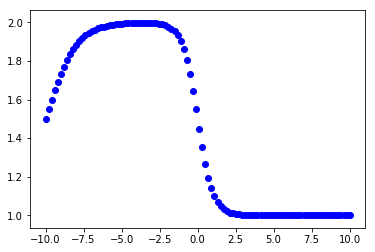

In [13]:
a = [[1,-2]]
b = [[10,0]]
x = np.linspace(-10,10,100)
plt.scatter(x,forward_1_2(a,b,x), color="blue")

In [14]:
x = np.linspace(-10,10,100)

def forward_1_2(a,b,x):
    return f(a[0][0]*x + b[0][0]) + f(a[0][1]*x + b[0][1])

def plt_1_2(a1=1,b1=0,a2=1,b2=0):
    plt.scatter(x,forward_1_2([[a1,a2]],[[b1,b2]],x), color="blue")
    plt.axis([-10,10,0,2])
    plt.show()
    
interact(plt_1_2, a1=(-10,10,0.1), b1=(-10,10,0.1), a2=(-10,10,0.1), b2=(-10,10,0.1))

<function __main__.plt_1_2>

## One input, one output, two layer, width = 1

In [15]:
x = np.linspace(-10,10,100)

def forward_1_1(a,b,x):
    return f(a[0][0]*(f(a[0][1]*x + b[0][1])) + b[0][0])

def plt_1_1(a1=1,b1=0,a2=1,b2=0):
    plt.scatter(x,forward_1_2([[a1,a2]],[[b1,b2]],x), color="blue")
    plt.axis([-10,10,0,1])
    plt.show()
    
interact(plt_1_1, a1=(-10,10,0.1), b1=(-10,10,0.1), a2=(-10,10,0.1), b2=(-10,10,0.1))

<function __main__.plt_1_1>